In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
img = np.array(Image.open('zebra.jpg'))
img_smap = np.load('zebra_sigma_map.npy')

In [5]:
img_pad = np.vstack([np.hstack([img[::-1,:,:],img[::-1,::-1,:]]),np.hstack([img,img[:,::-1,:]])])

In [22]:
current_height = 480
current_width = 480
[i_height,i_width] = [120,360]
sigma = img_smap[i_height,i_width]
tsg = np.array([[np.exp(-((i_ref_p)**2+(j_ref_p)**2)/(2*sigma**2))\
            for j_ref_p in range(-i_width+1,2*current_width-i_width+1)]\
            for i_ref_p in range(-i_height-current_height+1,current_height-i_height+1)])
tsg = tsg/np.sum(tsg)

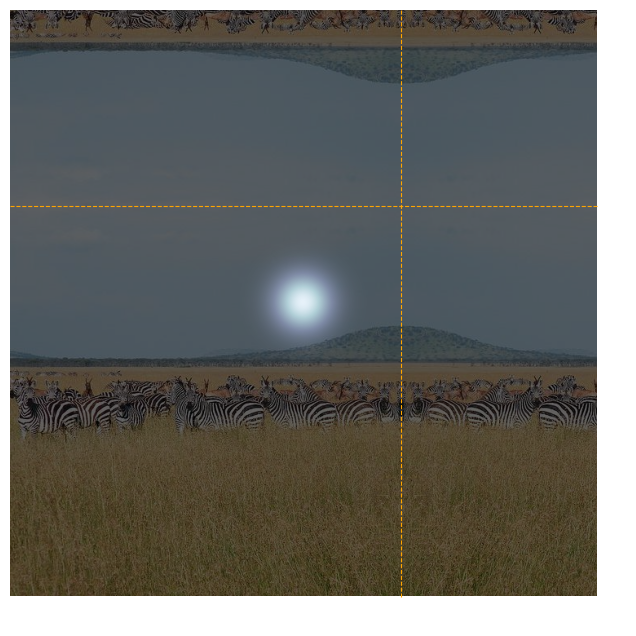

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(img_pad[240:,:720])
plt.imshow(tsg[240:,:720],cmap='bone',alpha=0.6)
plt.plot([0,720], [240,240], '--',color="orange", linewidth=0.8) 
plt.plot([480,480], [0,720], '--',color="orange", linewidth=0.8) 
plt.axis('off')
plt.savefig('zebra_tsg_1.png',bbox_inches='tight')

In [11]:
[i_height,i_width] = [20,460]
sigma = img_smap[i_height,i_width]
tsg = np.array([[np.exp(-((i_ref_p)**2+(j_ref_p)**2)/(2*sigma**2))\
            for j_ref_p in range(-i_width+1,2*current_width-i_width+1)]\
            for i_ref_p in range(-i_height-current_height+1,current_height-i_height+1)])
tsg = tsg/np.sum(tsg)

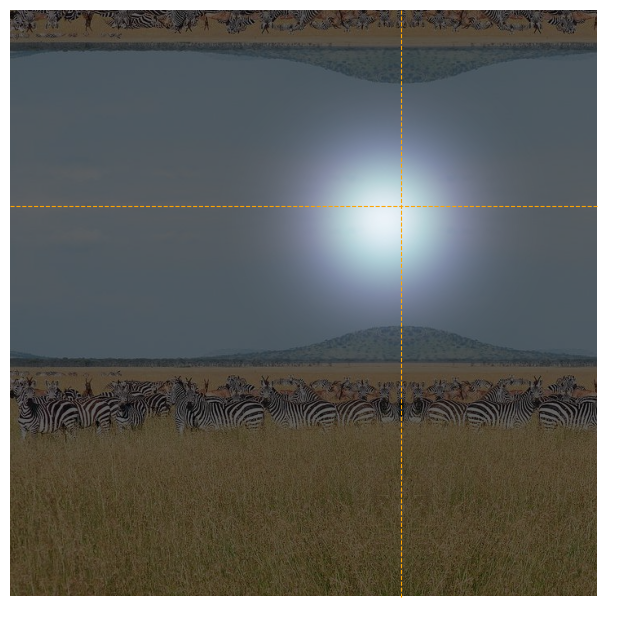

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(img_pad[240:,:720])
plt.imshow(tsg[240:,:720],cmap='bone',alpha=0.6)
plt.plot([0,720], [240,240], '--',color="orange", linewidth=0.8) 
plt.plot([480,480], [0,720], '--',color="orange", linewidth=0.8) 
plt.axis('off')
plt.savefig('zebra_tsg_2.png',bbox_inches='tight')